In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
import pandas as pd
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

**1. Application of regression analysis**

In [8]:
# read data:
data1 = pd.read_csv("/diamonds.csv")
data1.keys()

Index(['index', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'length', 'width', 'heigth'],
      dtype='object')

In [9]:
data1.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
length     0
width      0
heigth     0
dtype: int64

In [10]:
data1

,index,carat,cut,color,clarity,depth,table,price,length,width,heigth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
def correlation(data, threshold):
    corr = data.corr()['carat'].sort_values(ascending=False)[1:]
    abs_corr = abs(corr)
    relevant_features = abs_corr[abs_corr>threshold]
    return relevant_features

In [12]:
print(correlation(data1, 0.8))

length    0.975094
heigth    0.953387
width     0.951722
price     0.921591
Name: carat, dtype: float64


**Linear regression**

In [13]:
model1 = ols("carat ~ length", data1).fit()  # a linear relationship between carat and diamond length
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.043e+06
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:06:18   Log-Likelihood:                 44965.
No. Observations:               53940   AIC:                        -8.993e+04
Df Residuals:                   53938   BIC:                        -8.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5635      0.002   -663.450      0.0

**Multiple**

In [14]:
model2 = ols("carat ~ length+width", data1).fit()  #two factors
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 5.216e+05
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:06:18   Log-Likelihood:                 44984.
No. Observations:               53940   AIC:                        -8.996e+04
Df Residuals:                   53937   BIC:                        -8.993e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5640      0.002   -663.472      0.0

In [15]:
model3 = ols("carat ~ length*heigth", data1).fit()  # two factors + their interaction (product)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.043e+06
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:06:19   Log-Likelihood:                 44965.
No. Observations:               53940   AIC:                        -8.993e+04
Df Residuals:                   53938   BIC:                        -8.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5635      0.002   -663.450      0.0

**Quadratic**

In [16]:
model4 = ols("carat ~ I(length**2)", data1).fit()  
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.018e+06
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:06:19   Log-Likelihood:                 72746.
No. Observations:               53940   AIC:                        -1.455e+05
Df Residuals:                   53938   BIC:                        -1.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3971      0.001   -537.

**Polynomial**

In [17]:
model5 = ols("carat ~ length*width+I(price**2)", data1).fit()  
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.326e+06
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:06:19   Log-Likelihood:                 87758.
No. Observations:               53940   AIC:                        -1.755e+05
Df Residuals:                   53935   BIC:                        -1.755e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5626      0.006     96.084

**2.Estimation of the unconditional and conditional probabilities**

**Conditional**

In [18]:
# conditional probability that price is greater than 10000 in all cuts
data_temp = data1.loc[data1["price"]>10000,"cut"]
# with .loc certain types are accessed (first index), and certain columns (second index)
data_temp=data_temp.value_counts()
print(data_temp)

Premium      1807
Ideal        1770
Very Good    1124
Good          374
Fair          147
Name: cut, dtype: int64


In [19]:
data_temp1 = data1["cut"].value_counts() # all persons with experience
print(data_temp1)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [20]:
# probabilities are obtained by dividing data_temp and data_temp1:
P_cond = pd.DataFrame(data_temp/data_temp1) # DataFrame structure with probabilities

P_cond.columns = ["Conditional probability"]
P_cond.head()

,Conditional probability
Fair,0.091304
Good,0.076233
Ideal,0.082131
Premium,0.131027
Very Good,0.093031


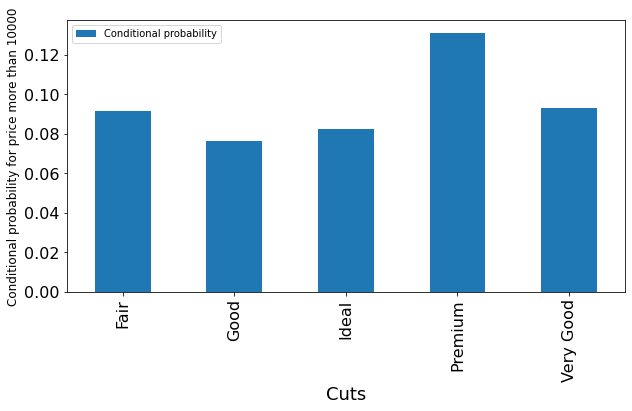

In [21]:
# Drawing bar graf:
P_cond.plot.bar(figsize=(10,5),fontsize=16)
plt.xlabel("Cuts",fontsize=18)
plt.ylabel("Conditional probability for price more than 10000",fontsize=12)
plt.show()

**Unconditional probability**

In [22]:
# determining the unconditional probability of cuts

data2 = data1["cut"].value_counts()  # value_counts () returns a pandas array with the number of elements of each value

data2  

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

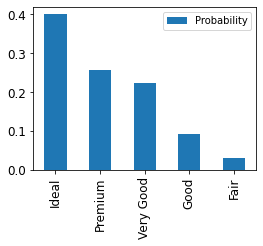

In [23]:
# different cuts of diamonds
P_uncond = pd.DataFrame((data2/data2.sum()))

P_uncond.columns=["Probability"]  # we set the only column of P_S DataFrame to be "Probability"

P_uncond.plot.bar(figsize=(4,3),fontsize=12)  # we plot at least a graph - it is most often used for probabilities of discrete events
plt.show() # preview

**3. Estimation of the parameters of distributions of single variables (mathematical expectation, variance, standard deviation, median, quartiles, quantiles...)**

**Mathematical expectation**

In [24]:
# confidence interval for mathematical expectation:

alpha=0.03   # the confidence level is 1-alpha = 0.97

print(data1.mean()['price'])  # we print the estimated value

quantile_order=1-alpha/2
Quantile = stats.norm.ppf(quantile_order)  # Quantile of the corresponding order of the Z distribution (normal (0,1) distribution)
                  
margin = Quantile * (data1.std()['price']/len(data1)**0.5)

confidence_interval = (data1.mean()['price'] - margin, data1.mean()['price'] + margin)
confidence_interval

3932.799721913237


(3895.52329649506, 3970.076147331414)

**Variance**

In [25]:
df2 = pd.read_csv("/diamonds.csv",usecols=["table"])
df3 = pd.read_csv("/diamonds.csv",usecols=["length", "width", "heigth"])

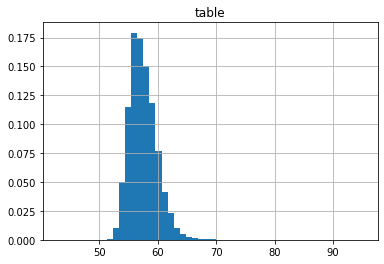

In [26]:
hist = df2.hist(density=True,bins=50) 
plt.show()

In [27]:
df2.describe() # with this command the pandas automatically calculates the characteristic quantities we need

,table
count,53940.000000
mean,57.457184
std,2.234491
min,43.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,95.000000


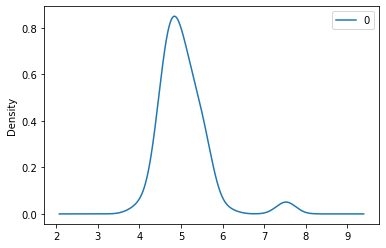

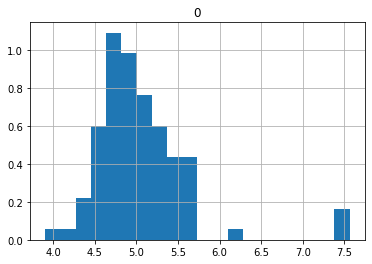

In [28]:
# we want to estimate the variance by taking only a small sample from the whole population:
mean_estimators = []       

sample_size=500
number_of_mean_estimators=100   # this is the number of estimates, each based on a sample size 'velicina_uzorka'
for x in range(number_of_mean_estimators):         # Generate 150 samples
    
    sample=df2.sample(sample_size)
    mean_estimators.append( sample.var()['table'] )
    
# we plot the estimation of the probability density distribution of variance estimates (using histograms) - we see that it is approximately normal!  
pd.DataFrame(mean_estimators).plot(kind="density")   

# histogram estimate of variance:
hist = pd.DataFrame(mean_estimators).hist(density=True,bins=20) 
plt.show()

**Standard deviation, median, quartiles, quantiles**

In [29]:
#median:
df2.median()

table    57.0
dtype: float64

In [30]:
# standard deviation
std_dev=df2.std() # standard deviation for 'table' column
std_dev

table    2.234491
dtype: float64

In [31]:
#quartiles
print(df3.quantile(0.25))
print('---------------------')
print(df3.quantile(0.75))

length    4.71
width     4.72
heigth    2.91
Name: 0.25, dtype: float64
---------------------
length    6.54
width     6.54
heigth    4.04
Name: 0.75, dtype: float64


In [32]:
# quantiles:
df3.quantile(0.1)

length    4.36
width     4.36
heigth    2.69
Name: 0.1, dtype: float64

**4. Estimation of confidence intervals of certain parameters**

In [38]:
mean_estimators= []

sample_size=500
number_of_mean_estimators=100
for x in range (number_of_mean_estimators):
  sample=data1['table'].sample(sample_size)
  mean_estimators.append(sample.values.mean())

In [41]:
alpha=0.01      # the confidence level is 1-alpha = 0.99
std=data1['table'].std()
quanitle_order=1-alpha/2
Quantile=stats.norm.ppf(quanitle_order)
margin=Quantile*(std/sample_size**0.5)

In [42]:
confidence_interval= (mean_estimators[0]-margin,mean_estimators[0]+margin)
print(mean_estimators[0])     # we print the estimated value
print(confidence_interval)

57.446600000000004
(57.18919877927982, 57.70400122072019)


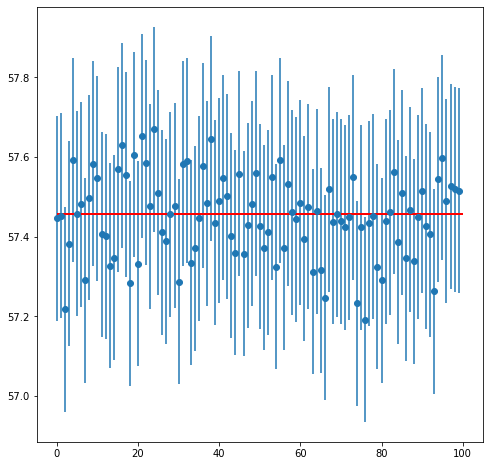

In [43]:
#drawing all confidence intervals
CIs=[]


for i in range (0,number_of_mean_estimators):
  CIs.append((mean_estimators[i]-margin, mean_estimators[i]+margin))

# drawing a confidence interval:
plt.figure(figsize=(8,8))

# we draw intervals using plt.errorbar:
plt.errorbar(x=np.arange(0,number_of_mean_estimators),
             y=mean_estimators[0:number_of_mean_estimators],
             yerr=[(up-down)/2 for up,down in CIs],
             fmt='o')
plt.hlines(xmin=0,xmax=number_of_mean_estimators,
           y=data1['table'].mean(),
           linewidth=2.0,
           color="red")

**5. Estimation of the parameters of the joint distributions (covariance, correlation coefficient)**

In [35]:
df3.cov()

,length,width,heigth
length,1.258347,1.248789,0.768487
width,1.248789,1.304472,0.767320
heigth,0.768487,0.767320,0.498011


In [36]:
data1.cov()['length']['width']/(data1.std()['length']*data1.std()['width']) # correlation coefficient between length and width

0.9747014796704061

In [37]:
data1.corr()

,index,carat,depth,table,price,length,width,heigth
index,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
heigth,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
